## importing the liberies 

In [2]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## importing the dataset 

In [4]:
df1 = pd.read_csv(r"C:\Users\U S E R\Downloads\QVI_purchase_behaviour.csv")
df2 = pd.read_csv(r"C:\Users\U S E R\Downloads\QVI_transaction_data (1).csv")

## merging the two datasets 

In [6]:
merged_df = pd.merge(df1, df2, on='LYLTY_CARD_NBR', how='inner') 

### showing the head

In [8]:
merged_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


### show the displays 

In [10]:
pd.set_option('display.max_rows', None)

### convert the date column to date

In [12]:
# Convert Excel-style serial date to proper date
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'], origin='1899-12-30', unit='D')


In [13]:
full_dates = pd.date_range(start="2018-07-01", end="2019-06-30")
missing_dates = full_dates.difference(merged_df['DATE'])


### create a pack size column

In [15]:
merged_df['PACK_SIZE'] = merged_df['PROD_NAME'].str.extract(r'(\d{2,4}g)', flags=re.IGNORECASE, expand=False)
merged_df['PACK_SIZE'] = merged_df['PACK_SIZE'].str.lower()
print(merged_df['PACK_SIZE'].unique())


['175g' '150g' '210g' '160g' '165g' '110g' '330g' '170g' '300g' '180g'
 '135g' '70g' '220g' '190g' '270g' '90g' '200g' '134g' '380g' '125g'
 '250g']


### create a pack size column

In [17]:
merged_df['BRAND'] = merged_df['PROD_NAME'].str.split().str[0]

### cleaning the data sets 

In [19]:
# 1. Rename 'natural' in the BRAND column
merged_df['BRAND'] = merged_df['BRAND'].replace('Natural', 'Natural Chip Company')

# 2. Correct 'Natural Chip Compny' to 'Natural Chip Company' in the PROD_NAME column
merged_df['PROD_NAME'] = merged_df['PROD_NAME'].str.replace('Natural Chip Compny SeaSalt175g', 'Natural Chip Company Sea Salt 175g')
# 2. Correct 'grain' to 'grain waves' in the Brand column
merged_df['BRAND'] = merged_df['BRAND'].replace('Grain', 'Grain Waves')
merged_df['PROD_NAME'] = merged_df['PROD_NAME'].str.replace('Natural ChipCo Hony Soy Chckn175g', 'Natural ChipCo Hony Soy Chicken 175g')
merged_df['PROD_NAME'] = merged_df['PROD_NAME'].str.replace('GrnWves Plus Btroot & Chilli Jam 180g', 'grain waves plus beetroot sweet chilli jam 180g')


In [20]:

# Define the replacement rules
prod_name_corrections = {
    r'\bChp\b': 'Chip',
    r'\bChps\b': 'Chips',
    r'Btroot': 'Beetroot',
    r'Feta&Garlic': 'Feta & Garlic',
    r'Chk|Chckn|Chikn': 'Chicken',
    r'\bChs\b': 'Cheese',
    r'Gcamole': 'Guacamole',
    r'Crnchers?': 'Crunchers',
    r'GrnWves': 'Grain Waves',
    r'Tmato': 'Tomato',
    r'\bHrb\b': 'Herb',
    r'Frch/Onin': 'French Onion',
    r'Infzns': 'Infuzions',
    r'Mzzrlla': 'Mozzarella',
    r'Orgnl|Originl': 'Original',
    r'S/Cream|Sr/Cream': 'Sour Cream',
    r'Slt Vingar': 'Salt & Vinegar',
    r'\bSwt\b': 'Sweet',
    r'Whlgrn|Whlegrn': 'Wholegrain',
    r'\bWW\b': 'Woolworths',
    r'\bSR\b': 'Slow Roasted',
    r'\bSnag\b': 'Sausage',
    r'Jlpno': 'Jalapeno',
    r'D/Style': 'Deli Style',
    r'Stny|Sthrn': 'Southern',
    r'Seasonedchicken': 'Seasoned Chicken',
    r'Stk': 'Steak',
    r'ChpsHny&Jlpno': 'Chips Honey & Jalapeno',
    r'SR Salsa & Mzzrlla': 'Slow Roasted Salsa & Mozzarella',
    r'SR Slow Rst Pork Belly': 'Slow Roasted Pork Belly',
    r'Steak & Chimuchurri': 'Steak & Chimichurri',  r'\bSnbts\b': 'Sunbites',
    r'\bWhlegrn|Whlgrn|Wholegrain\b': 'Wholegrain',
    r'\bCheddr\b': 'Cheddar',
    r'\bMstrd\b': 'Mustard',
    r'&': ' & '
}

brand_corrections = {
    r'^Natural$': 'Natural Chip Company',
    r'^NCC$': 'Natural Chip Company',
    r'^RRD$': 'Red Rock Deli',
    r'^WW$': 'Woolworths'
}

# Apply corrections to PROD_NAME
merged_df['PROD_NAME'] = merged_df['PROD_NAME'].replace(prod_name_corrections, regex=True)

# Apply corrections to BRAND
merged_df['BRAND'] = merged_df['BRAND'].replace(brand_corrections, regex=True)


In [21]:
merged_df['BRAND'] = merged_df['BRAND'].replace({
    'Red': 'Red Rock Deli',
    'Infzns': 'Infuzions',
    'GrnWves': 'Grain Waves',
    'French': 'French Fries',
    'Snbts' :'Sunbites',
    'Smith': 'Smiths',
    'Dorito':'Doritos',
    'Burger':'Burger Rings' 
})


In [22]:
prod_name_corrections = {
    r'\bCompny\b': 'Company',
    r'\bSeaSalt\b': 'Sea Salt',
    r'(?<=[a-zA-Z])(\d+g)\b': r' \1'  # Adds space before pack size like "175g"
}

merged_df['PROD_NAME'] = merged_df['PROD_NAME'].replace(prod_name_corrections, regex=True)
merged_df['PROD_NAME'] = merged_df['PROD_NAME'].str.replace(r'\s+', ' ', regex=True).str.strip()


In [23]:
merged_df['PROD_NAME'] = merged_df['PROD_NAME'].str.replace('Smithss', 'Smiths', case=False, regex=False)
merged_df['PROD_NAME'] = merged_df['PROD_NAME'].str.replace('Smith', 'Smiths', case=False, regex=False)

### Trim spaces from the 'PROD_NAME' column

In [25]:
merged_df['PROD_NAME'] = merged_df['PROD_NAME'].str.strip()

### creating the month week  and day of the week

In [27]:
# Create a new 'WEEK_OF_MONTH' column
def week_of_month(dt):
    first_day = dt.replace(day=1)
    dom = dt.day
    adjusted_dom = dom + first_day.weekday()  # adjust for what day the month starts on
    return int(np.ceil(adjusted_dom / 7.0))

merged_df['WEEK_OF_MONTH'] = merged_df['DATE'].apply(week_of_month)

# Optionally: add day of the week in words
merged_df['DAY_OF_WEEK'] = merged_df['DATE'].dt.day_name()

# Preview
print(merged_df[['DATE', 'WEEK_OF_MONTH', 'DAY_OF_WEEK']].head())

        DATE  WEEK_OF_MONTH DAY_OF_WEEK
0 2018-10-17              3   Wednesday
1 2018-09-16              3      Sunday
2 2019-03-07              2    Thursday
3 2019-03-08              2      Friday
4 2018-11-02              1      Friday


In [28]:
merged_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,WEEK_OF_MONTH,DAY_OF_WEEK
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Company SeaSalt 175g,2,6.0,175g,Natural Chip Company,3,Wednesday
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chicken & Garlic Aioli 150g,1,2.7,150g,Red Rock Deli,3,Sunday
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream & Chives 210G,1,3.6,210g,Grain Waves,2,Thursday
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chicken 175g,1,3.0,175g,Natural Chip Company,2,Friday
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,Woolworths Original Stacked Chips 160g,1,1.9,160g,Woolworths,1,Friday


### removing the unreasonable amoumt of qty purchanced  

In [30]:
customer_stats = merged_df.groupby('LYLTY_CARD_NBR')[['PROD_QTY']].sum().reset_index()
# Sort by quantity in descending order
customer_stats = customer_stats.sort_values(by='PROD_QTY', ascending=False)


print(customer_stats.head(5))


       LYLTY_CARD_NBR  PROD_QTY
59694          226000       400
42813          162039        36
60925          230078        36
45905          172032        35
3686            13138        34


In [31]:
filtered_df = merged_df[merged_df['PROD_QTY'] != 200]


### Drop salsa products from merged_df


In [33]:
merged_df = merged_df[~merged_df['PROD_NAME'].str.lower().str.contains('salsa')]


### Trim spaces from the 'PROD_NAME' column


In [35]:
merged_df['PROD_NAME'] = merged_df['PROD_NAME'].str.strip()

### List all unique brand names amd Sort them alphabetically (optional)


In [37]:
unique_brands = merged_df['BRAND'].dropna().unique()

unique_brands.sort()

# Display
for brand in unique_brands:
    print(brand)


Burger Rings
CCs
Cheetos
Cheezels
Cobs
Doritos
French Fries
Grain Waves
Infuzions
Kettle
Natural Chip Company
Pringles
Red Rock Deli
Smiths
Sunbites
Thins
Tostitos
Twisties
Tyrrells
Woolworths


# ANALYSIS

### to show the numerical summary 

In [40]:
merged_df.describe()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEEK_OF_MONTH
count,2.467420e+05,246742,246742.000000,2.467420e+05,246742.000000,246742.000000,246742.000000,246742.000000
mean,1.355310e+05,2018-12-30 01:19:01.211468288,135.051098,1.351311e+05,56.351789,1.908062,7.321322,3.111302
min,1.000000e+03,2018-07-01 00:00:00,1.000000,1.000000e+00,1.000000,1.000000,1.700000,1.000000
25%,7.001500e+04,2018-09-30 00:00:00,70.000000,6.756925e+04,26.000000,2.000000,5.800000,2.000000
50%,1.303670e+05,2018-12-30 00:00:00,130.000000,1.351830e+05,53.000000,2.000000,7.400000,3.000000
75%,2.030840e+05,2019-03-31 00:00:00,203.000000,2.026538e+05,87.000000,2.000000,8.800000,4.000000
max,2.373711e+06,2019-06-30 00:00:00,272.000000,2.415841e+06,114.000000,200.000000,650.000000,6.000000
std,8.071528e+04,NaN,76.787096,7.814772e+04,33.695428,0.659831,3.077828,1.310102


### Remove outlier where 200 packets were bought:


In [42]:
merged_df = merged_df[merged_df['PROD_QTY'] != 200]


In [43]:
flitered_card_num = merged_df[merged_df['LYLTY_CARD_NBR'] != 226000]

In [44]:
# Step 1: Remove duplicate transactions per customer per day
transactions_per_customer = merged_df.drop_duplicates(subset=['LYLTY_CARD_NBR', 'DATE'])

# Step 2: Count number of unique transactions per customer
transaction_counts = transactions_per_customer.groupby('LYLTY_CARD_NBR').size().reset_index(name='TRANSACTION_COUNT')

# Step 3: Sort in descending order (optional)
transaction_counts = transaction_counts.sort_values(by='TRANSACTION_COUNT', ascending=False)

# Step 4: View the result
print(transaction_counts.head())


       LYLTY_CARD_NBR  TRANSACTION_COUNT
59820          230078                 17
42037          162039                 17
28058          105026                 16
47076          179228                 16
30174          113080                 15


### Transactions over time

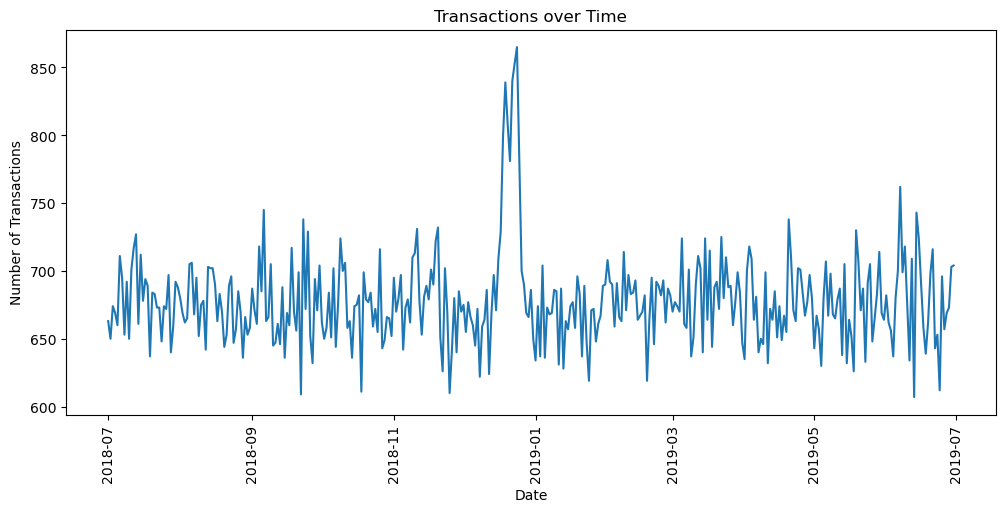

In [46]:
transactions_per_day = merged_df.groupby("DATE").size().reset_index(name="count")
plt.figure(figsize=(12,5))
plt.plot(transactions_per_day["DATE"], transactions_per_day["count"])
plt.title("Transactions over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=90)
plt.show()

### total sales by customer segment 


                                         TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
OLDER FAMILIES         Budget            156863.75
YOUNG SINGLES/COUPLES  Mainstream        147582.20
RETIREES               Mainstream        145168.95
YOUNG FAMILIES         Budget            129717.95
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123537.55
RETIREES               Budget            105916.30
OLDER FAMILIES         Mainstream         96413.55
RETIREES               Premium            91296.65
YOUNG FAMILIES         Mainstream         86338.25
MIDAGE SINGLES/COUPLES Mainstream         84734.25
YOUNG FAMILIES         Premium            78571.70
OLDER FAMILIES         Premium            75242.60
YOUNG SINGLES/COUPLES  Budget             57122.10
MIDAGE SINGLES/COUPLES Premium            54443.85
YOUNG SINGLES/COUPLES  Premium            39052.30
MIDAGE SINGLES/COUPLES Budget  

<Axes: xlabel='LIFESTAGE,PREMIUM_CUSTOMER'>

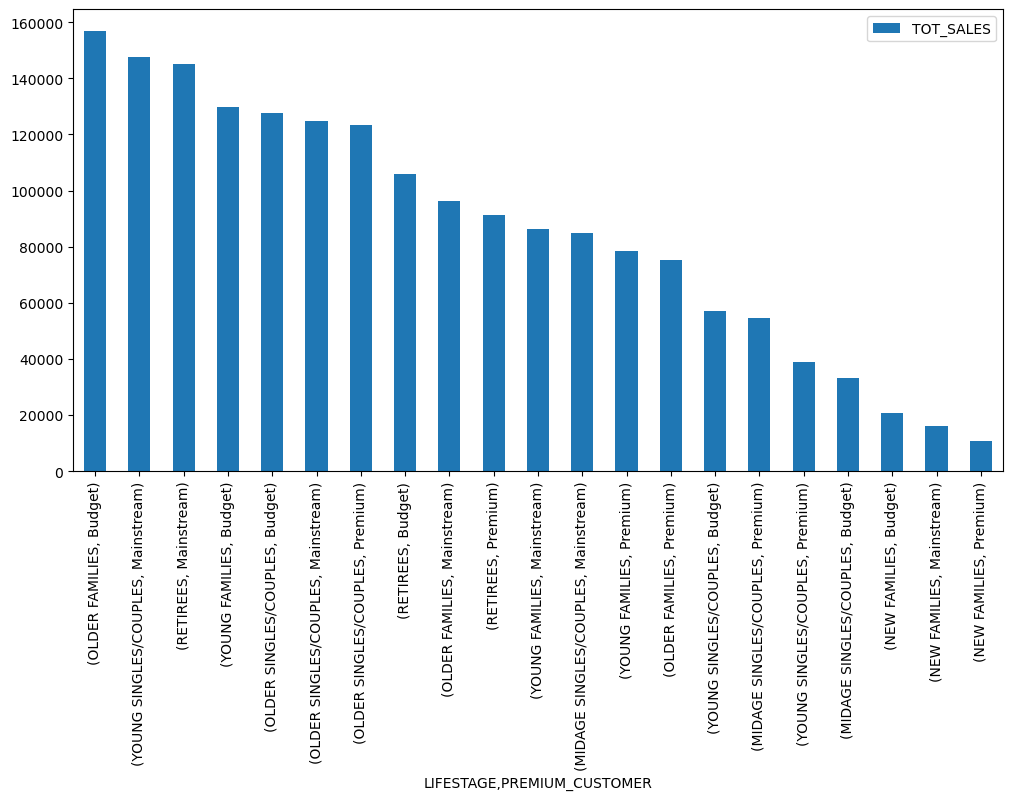

In [48]:
seg_stat = (
    merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['TOT_SALES']]
    .sum()
    .sort_values(by='TOT_SALES', ascending=False)
)

print(seg_stat)
seg_stat.plot(kind='bar', stacked=True, figsize=(12,6))


In [49]:
### unique transactions

distinct_transactions = merged_df['TXN_ID'].nunique()
distinct_transactions

245255

In [50]:
### most product ordered in daysof the week

# Define the correct order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Step 1: Group by day and product, get average quantity
brand_day_stats = merged_df.groupby(['DAY_OF_WEEK', 'PROD_NAME'])[['PROD_QTY']].sum().reset_index()

# Step 2: Get top-selling product per day
top_brand_per_day = brand_day_stats.sort_values('PROD_QTY', ascending=False).groupby('DAY_OF_WEEK').first().reset_index()

# Step 3: Convert DAY_OF_WEEK to categorical with correct order
top_brand_per_day['DAY_OF_WEEK'] = pd.Categorical(top_brand_per_day['DAY_OF_WEEK'], categories=day_order, ordered=True)

# Step 4: Sort based on day order
top_brand_per_day = top_brand_per_day.sort_values('DAY_OF_WEEK')

# Display result
print(top_brand_per_day)


  DAY_OF_WEEK                                      PROD_NAME  PROD_QTY
1      Monday             Tyrrells Crisps Ched & Chives 165g       949
5     Tuesday  Cobs Popd Sweet/Chlli & Sour Cream Chips 110g       944
6   Wednesday         Doritos Corn Chips Cheese Supreme 170g       952
4    Thursday                  Cobs Popd Sea Salt Chips 110g       923
0      Friday           Kettle Mozzarella Basil & Pesto 175g       998
2    Saturday                 Thins Chips Light & Tangy 175g       964
3      Sunday           Kettle Mozzarella Basil & Pesto 175g      1058


### most purchased pack size 


In [52]:
packsize_stats = merged_df.groupby('PACK_SIZE')[['PROD_QTY']].sum().reset_index()
packsize_stats = packsize_stats.sort_values(by='PROD_QTY', ascending=False)
print(packsize_stats)

   PACK_SIZE  PROD_QTY
8       175g    126467
4       150g     76662
2       134g     48019
0       110g     42835
7       170g     38088
6       165g     29051
16      330g     23999
17      380g     12273
15      270g     12049
12      210g     11962
11      200g      8425
3       135g      6212
14      250g      6069
19       90g      5692
10      190g      5673
5       160g      5604
13      220g      2970
18       70g      2855
9       180g      2764
1       125g      2730


### most sales and brand in the day of the week


In [54]:

day_and_brand_stats = merged_df.groupby([ 'DAY_OF_WEEK'])[['PROD_QTY']].sum().reset_index()

# Sort by PROD_QTY descending
day_and_brand_stats = day_and_brand_stats.sort_values(by=['PROD_QTY'], ascending=False)

# Optional: view result
print(day_and_brand_stats.head())

  DAY_OF_WEEK  PROD_QTY
3      Sunday     68816
0      Friday     68127
6   Wednesday     67419
2    Saturday     66977
1      Monday     66801


### most generally purchased brand 


In [56]:

brand_sales = merged_df.groupby('BRAND')[['PROD_QTY']].sum().reset_index()

# Sort by total quantity descending
brand_sales = brand_sales.sort_values(by='PROD_QTY', ascending=False)

# View top-selling brands
print(brand_sales)

                   BRAND  PROD_QTY
9                 Kettle     79051
13                Smiths     57582
5                Doritos     48331
11              Pringles     48019
12         Red Rock Deli     30891
8              Infuzions     27119
15                 Thins     26929
19            Woolworths     22333
4                   Cobs     18571
16              Tostitos     18134
17              Twisties     18118
7            Grain Waves     14726
10  Natural Chip Company     14106
18              Tyrrells     12298
3               Cheezels      8747
1                    CCs      8609
14              Sunbites      5692
2                Cheetos      5530
0           Burger Rings      2970
6           French Fries      2643


### most packs per transaction 


In [58]:

packsize_stats = merged_df.groupby('PACK_SIZE')['PROD_QTY'].sum().sort_values(ascending=False)
print(packsize_stats)

PACK_SIZE
175g    126467
150g     76662
134g     48019
110g     42835
170g     38088
165g     29051
330g     23999
380g     12273
270g     12049
210g     11962
200g      8425
135g      6212
250g      6069
90g       5692
190g      5673
160g      5604
220g      2970
70g       2855
180g      2764
125g      2730
Name: PROD_QTY, dtype: int64


### Average sales per customer segments 


In [60]:

txn_sales = merged_df.groupby(['TXN_ID', 'LYLTY_CARD_NBR'])['TOT_SALES'].sum().reset_index()
customer_info = merged_df[['TXN_ID', 'LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']].drop_duplicates()
txn_sales = txn_sales.merge(customer_info, on=['TXN_ID', 'LYLTY_CARD_NBR'], how='left')
avg_sales_segment = txn_sales.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()
avg_sales_segment = avg_sales_segment.sort_values(by='TOT_SALES', ascending=False)

print(avg_sales_segment)

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
1   MIDAGE SINGLES/COUPLES       Mainstream   7.679377
19   YOUNG SINGLES/COUPLES       Mainstream   7.575311
11   OLDER SINGLES/COUPLES          Premium   7.499851
14                RETIREES          Premium   7.495620
12                RETIREES           Budget   7.486838
9    OLDER SINGLES/COUPLES           Budget   7.485279
15          YOUNG FAMILIES           Budget   7.358214
6           OLDER FAMILIES           Budget   7.356897
10   OLDER SINGLES/COUPLES       Mainstream   7.350425
17          YOUNG FAMILIES          Premium   7.342463
7           OLDER FAMILIES       Mainstream   7.342438
4             NEW FAMILIES       Mainstream   7.326777
3             NEW FAMILIES           Budget   7.325791
8           OLDER FAMILIES          Premium   7.303689
13                RETIREES       Mainstream   7.302996
16          YOUNG FAMILIES       Mainstream   7.279785
5             NEW FAMILIES          Premium   7.256102
2   MIDAGE

### brand by quantity per day 

In [62]:
# Step 1: Group by brand and day, summing daily quantity
brand_daily_totals = merged_df.groupby(['BRAND', 'DATE'])['PROD_QTY'].sum().reset_index()

# Step 2: Now group by brand again to calculate average per day
brand_avg_per_day = brand_daily_totals.groupby('BRAND')['PROD_QTY'].mean().reset_index()

# Step 3: Sort to find the brand with the highest average per day
brand_avg_per_day = brand_avg_per_day.sort_values(by='PROD_QTY', ascending=False)

# Optional: Rename column for clarity
brand_avg_per_day = brand_avg_per_day.rename(columns={'PROD_QTY': 'AVG_PROD_QTY_PER_DAY'})

# View top brands
print(brand_avg_per_day.head())


            BRAND  AVG_PROD_QTY_PER_DAY
9          Kettle            217.173077
13         Smiths            158.192308
5         Doritos            132.777473
11       Pringles            131.920330
12  Red Rock Deli             84.865385


### No of transaction 

In [64]:
transaction_counts = merged_df['TXN_ID'].nunique()
print(transaction_counts)


245255


In [65]:
customer_count = merged_df['LYLTY_CARD_NBR'].nunique()
print(customer_count)

avg_transactions_per_customer = transaction_counts / customer_count

print("Average transactions per customer:", avg_transactions_per_customer)

71287
Average transactions per customer: 3.4403888507020914


### to know if they are missing date 

In [67]:
#### Count the Number of Transactions by Date




transactions_by_day = (
    merged_df.groupby('DATE')
    .size()
    .reset_index(name='N')
    .sort_values('DATE'))
print(transactions_by_day.head())


        DATE    N
0 2018-07-01  663
1 2018-07-02  650
2 2018-07-03  674
3 2018-07-04  669
4 2018-07-05  660


### Identifying the Missing Date in the Dataset


In [69]:

full_dates = pd.DataFrame({
    'DATE': pd.date_range("2018-07-01", "2019-06-30")
})

# 2. Merge your actual transaction counts with this full calendar
transactions_by_day = full_dates.merge(transactions_by_day, on='DATE', how='left')

# 3. Replace NaN (missing values) with 0 → meaning no transactions recorded that day
transactions_by_day = transactions_by_day.fillna(0)

full_dates = pd.DataFrame({
    'DATE': pd.date_range("2018-07-01", "2019-06-30")
})
transactions_by_day = full_dates.merge(
    transactions_by_day, on='DATE', how='left'
).fillna(0)
missing_days = transactions_by_day[transactions_by_day['N'] == 0]
print(missing_days)

          DATE    N
177 2018-12-25  0.0


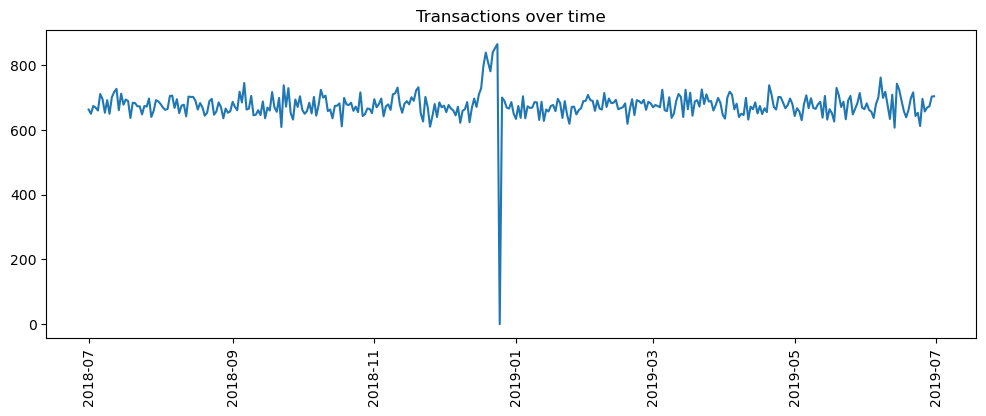

In [70]:
#### plotting it 

plt.figure(figsize=(12,4))
plt.plot(transactions_by_day['DATE'], transactions_by_day['N'])
plt.xticks(rotation=90)
plt.title("Transactions over time")
plt.show()

### segment by average units purchase 

                 LIFESTAGE PREMIUM_CUSTOMER  AVG_UNITS
7           OLDER FAMILIES       Mainstream   1.948795
8           OLDER FAMILIES          Premium   1.945496
6           OLDER FAMILIES           Budget   1.945384
16          YOUNG FAMILIES       Mainstream   1.941408
15          YOUNG FAMILIES           Budget   1.941226
17          YOUNG FAMILIES          Premium   1.938149
9    OLDER SINGLES/COUPLES           Budget   1.914920
11   OLDER SINGLES/COUPLES          Premium   1.913949
1   MIDAGE SINGLES/COUPLES       Mainstream   1.911942
10   OLDER SINGLES/COUPLES       Mainstream   1.911201
14                RETIREES          Premium   1.901438
0   MIDAGE SINGLES/COUPLES           Budget   1.893626
12                RETIREES           Budget   1.893286
2   MIDAGE SINGLES/COUPLES          Premium   1.891750
13                RETIREES       Mainstream   1.886680
5             NEW FAMILIES          Premium   1.860887
4             NEW FAMILIES       Mainstream   1.858124
3         

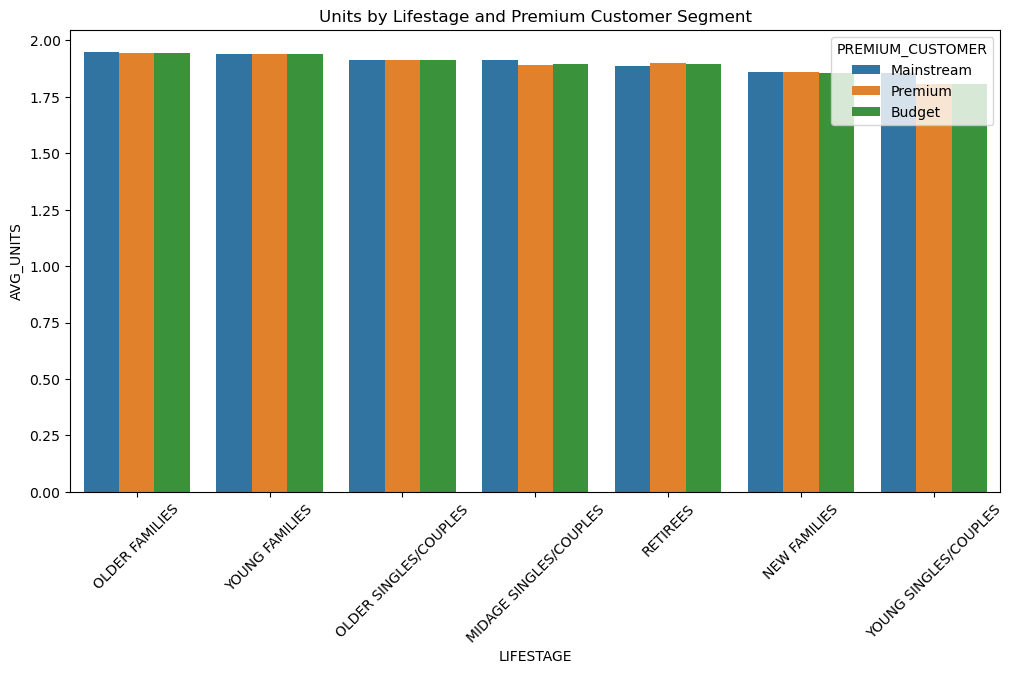

In [72]:
# Step 1: Group and calculate average units
avg_units = (
    merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY']
    .mean()
    .reset_index(name='AVG_UNITS')
)

# Step 2: Sort by AVG_UNITS, not PROD_QTY
avg_units = avg_units.sort_values(by='AVG_UNITS', ascending=False)
print(avg_units)
# Step 3: Plot
plt.figure(figsize=(12,6))
sns.barplot(data=avg_units, x='LIFESTAGE', y='AVG_UNITS', hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=45)
plt.title("Units by Lifestage and Premium Customer Segment")
plt.show()


###  segment by number of customers 

                 LIFESTAGE PREMIUM_CUSTOMER  CUSTOMER_COUNT
0   MIDAGE SINGLES/COUPLES           Budget            1474
1   MIDAGE SINGLES/COUPLES       Mainstream            3298
2   MIDAGE SINGLES/COUPLES          Premium            2369
3             NEW FAMILIES           Budget            1087
4             NEW FAMILIES       Mainstream             830
5             NEW FAMILIES          Premium             575
6           OLDER FAMILIES           Budget            4611
7           OLDER FAMILIES       Mainstream            2788
8           OLDER FAMILIES          Premium            2231
9    OLDER SINGLES/COUPLES           Budget            4849
10   OLDER SINGLES/COUPLES       Mainstream            4858
11   OLDER SINGLES/COUPLES          Premium            4682
12                RETIREES           Budget            4385
13                RETIREES       Mainstream            6358
14                RETIREES          Premium            3812
15          YOUNG FAMILIES           Bud

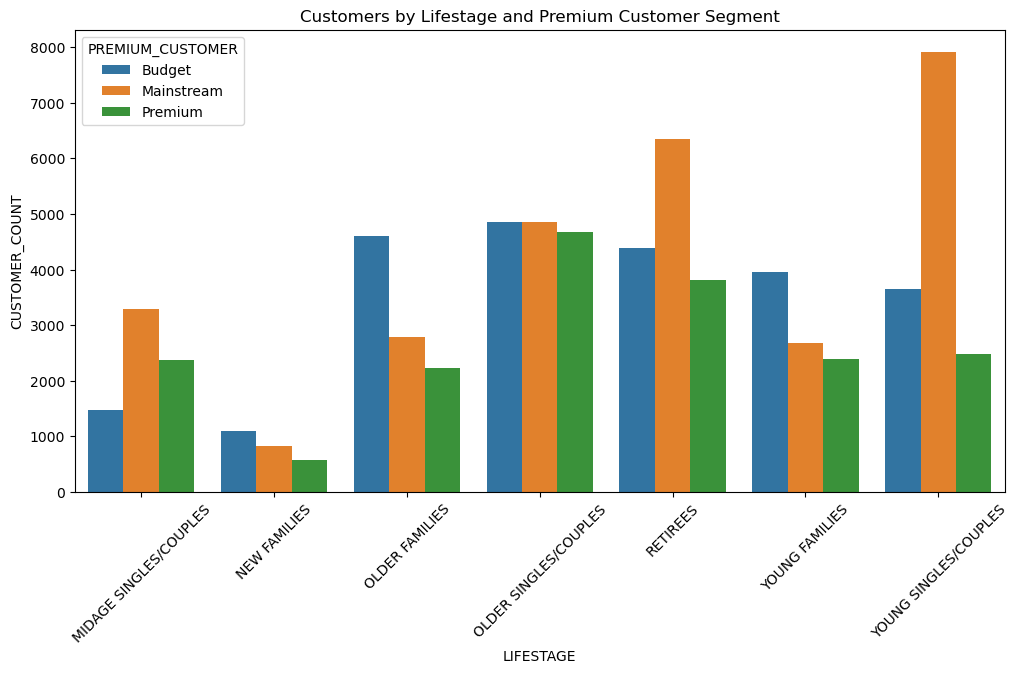

In [74]:

cust_counts = (merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index(name='CUSTOMER_COUNT'))
print(cust_counts)
plt.figure(figsize=(12,6))
sns.barplot(data=cust_counts,
            x='LIFESTAGE', y='CUSTOMER_COUNT', hue='PREMIUM_CUSTOMER')

plt.xticks(rotation=45)
plt.title( "Customers by Lifestage and Premium Customer Segment")
plt.show()

### ttest 


In [91]:
from scipy.stats import ttest_ind

# 1. Create UNIT_PRICE
merged_df["UNIT_PRICE"] = merged_df["TOT_SALES"] / merged_df["PROD_QTY"]

# 2. Filter group: Mainstream customers in Young/Mid-age Singles & Couples
mainstream = merged_df[
    (merged_df["PREMIUM_CUSTOMER"] == "Mainstream") &
    (merged_df["LIFESTAGE"].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))
]["UNIT_PRICE"]

# 3. Filter group: Budget + Premium customers in Young/Mid-age Singles & Couples
others = merged_df[
    (merged_df["PREMIUM_CUSTOMER"].isin(["Budget", "Premium"])) &
    (merged_df["LIFESTAGE"].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))
]["UNIT_PRICE"]

# 4. Calculate means
mean_mainstream = mainstream.mean()
mean_others = others.mean()

# 5. Run Welch’s t-test (no equal variance assumption)
t_stat, p_val = ttest_ind(mainstream, others, equal_var=False)

# 6. Print results
print("Average UNIT_PRICE (Mainstream):", round(mean_mainstream, 2))
print("Average UNIT_PRICE (Others: Budget + Premium):", round(mean_others, 2))
print("T-statistic:", round(t_stat, 4))
print("P-value:", round(p_val, 4))

# 7. Interpretation
if p_val < 0.05:
    print("✅ Significant difference between groups")
else:
    print("❌ No significant difference between groups")


Average UNIT_PRICE (Mainstream): 4.04
Average UNIT_PRICE (Others: Budget + Premium): 3.71
T-statistic: 37.6244
P-value: 0.0
✅ Significant difference between groups


### the brand that the customer segment -YOUNG SINGLES/COUPLES Mainstream customers purchase more 

In [ ]:
target_segment = merged_df[
    (merged_df['PREMIUM_CUSTOMER'] == 'Mainstream') &
    (merged_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')
]
brand_counts = target_segment['BRAND'].value_counts()
print(brand_counts)


### most purchased pack size

In [ ]:
pack_counts = target_segment['PACK_SIZE'].value_counts().sort_index()
print(pack_counts)


In [ ]:
other_customers = merged_df[
    ~((merged_df['PREMIUM_CUSTOMER'] == 'Mainstream') &
      (merged_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES'))
]

brand_compare = pd.crosstab(target_segment['BRAND'], merged_df['PREMIUM_CUSTOMER'])
pack_compare = pd.crosstab(target_segment['PACK_SIZE'], merged_df['PREMIUM_CUSTOMER'])
print(brand_compare)



# 📝 Chips Category Analysis – Quantium Case Study

## 1. Data Preparation

* Removed duplicates, checked null values, corrected data types.
* Merged transaction and customer tables on `LYLTY_CARD_NBR`.
* Derived extra features: pack size, brand name, transaction counts.

---

## 2. Customer Segments & Sales

**Key Insight:**

* *Mainstream – Young Singles/Couples* and *Mainstream – Retirees* purchase the most chips.
* *Budget – Older Families* also contribute heavily due to higher basket size per trip.


---

## 3. Brand & Product Preferences

**Findings:**

* Most popular brand: **\[kettle]**.
* Top product purchased: **\[Dorito Corn Chp Supreme 380g]**.
* Customers prefer pack sizes of **\[175g]**.


---

## 4. Seasonality & Trends

**Weekly/Monthly Patterns:**

* Highest sales on **\[sunday]**.
* Sales spike in **December** with **0 sales on Dec 25** (stores closed).


---

## 5. Transaction Behaviour

* Total number of transactions: **\[245257]**.
* Average transactions per customer: **\[ 3]**.
* Families (young/older) buy **more units per customer**.


---

## 6. Pricing & Spend

* Some segments (e.g. *Mainstream Young/Midage Singles/Couples and *) pay higher avg. unit prices.
* Families tend to buy larger volumes but at lower unit prices.

---

## 7. 📌 Recommendations

1. **Promote premium/value chips** to *Mainstream Young/Midage Singles/Couples 
* (they pay more).
2. **Bundle/multi-buy deals** for families (they buy more units).
3. **Seasonal push** before Christmas (increase stock + promotions).
4. **Partner with top brands ** to increase visibility & loyalty.

---

That’s your skeleton 💀.

👉 You just drop your code + outputs under each section.
👉 Export to PDF.
👉 Done ✅.

Do you want me to **write out the exact Markdown cells** for you (so you can just copy-paste into Jupyter), with placeholders for your actual findings?
